In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib
from sqlalchemy import create_engine

Establish connection with database

In [3]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'postgres' 
POSTGRES_DBNAME = 'greyhounds'

postgres_str = f"postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}"

# Create the connection
cnx = create_engine(postgres_str)

# Who won the race?

In [5]:
race_winner = pd.read_sql_query('''
SELECT p.race_id, p.box
FROM positions p
RIGHT JOIN
    (SELECT race_id, max(dog_id) as dog_id
FROM positions 
WHERE fin = 1
GROUP BY race_id) win
ON p.race_id = win.race_id AND p.dog_id = win.dog_id
''', cnx)
race_winner

,race_id,box
0,2539775,3
1,2851623,5
2,2539776,3
3,2851624,4
4,2539777,1
...,...,...
54205,2539770,1
54206,2539771,4
54207,2539772,2
54208,2539773,1


As a check we look at the website for race_id 2539775 and we can see that it confirms our data is correct. The dog in box 3 won the race

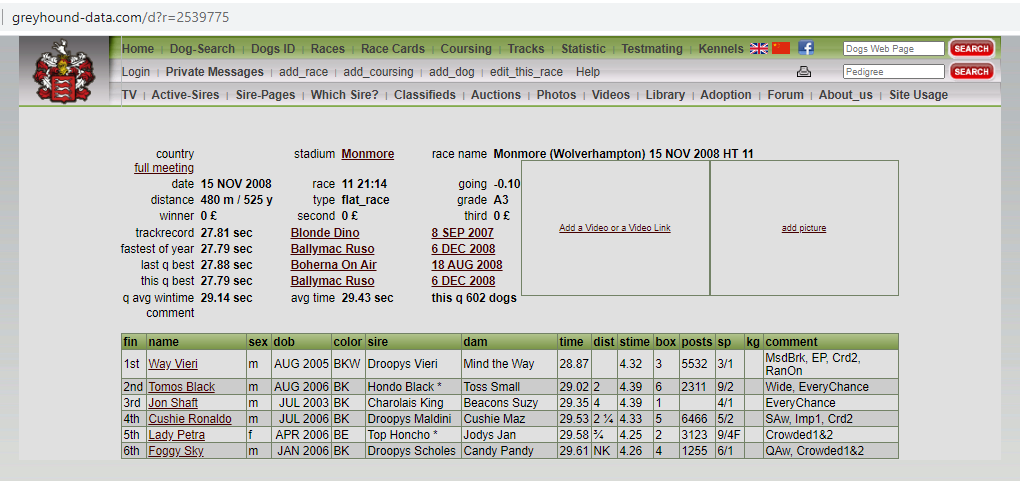

# How many dogs entered the race
Usually there are 6 dogs running in the race. However often there are 5 and sometimes even fewer dogs running in the race

In [9]:
pd.read_sql_query('''
SELECT no_runners, count(*) as race_count
FROM
    (SELECT race_id, max(fin) as no_runners
    FROM positions
    GROUP BY race_id) subquery
GROUP BY no_runners
ORDER BY count(*) desc

''', cnx)

,no_runners,race_count
0,6,52384
1,5,1743
2,4,59
3,3,28
4,2,5
5,7,1
6,1,1


For our modelling we'll restrict ourselves to only those races with 6 runners. We'll therefore create a table that we can use later

In [12]:
runners = pd.read_sql_query('''
SELECT race_id, max(fin) as no_runners
            FROM positions
            GROUP by race_id
''', cnx)
runners

,race_id,no_runners
0,3421950,6
1,1166354,6
2,1068535,6
3,2698243,6
4,3940294,6
...,...,...
54216,2671630,6
54217,590542,6
54218,3919248,6
54219,2876066,6
